# Neural Networks

## XNOR

In [1]:
import numpy as np
from si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
from si.supervised import NN, Dense, Activation
from si.util import Sigmoid, cross_entropy, cross_entropy_prime

In [4]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [5]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True

In [7]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [8]:
nn.cost(dataset.X,dataset.y)

2.066588540474394e-09

## Train the model using backpropagation

In [9]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [10]:
nn2.fit(dataset)
nn2.is_fitted = True #professor ele realizava o fit, mad não mudava o is_fitted para true, dai ter forçado aqui

och 44510/100000, error= 0.2500003522006798epoch 49424/100000, error= 0.25000024681762245epoch 50371/100000, error= 0.25000022760902385epoch 54175/100000, error= 0.2500001524322421epoch 55140/100000, error= 0.2500001336658391epoch 57097/100000, error= 0.2500000957220381epoch 58040/100000, error= 0.2500000774261341epoch 59869/100000, error= 0.2500000417721934epoch 60626/100000, error= 0.2500000269100115epoch 65356/100000, error= 0.2499999315539862epoch 68058/100000, error= 0.24999987419909467epoch 68974/100000, error= 0.24999985411331188epoch 70646/100000, error= 0.24999981646549638epoch 74394/100000, error= 0.24999972655626432epoch 80138/100000, error= 0.24999956908426024epoch 81991/100000, error= 0.24999951167835036epoch 83706/100000, error= 0.24999945501580811epoch 84805/100000, error= 0.24999941672271103epoch 85688/100000, error= 0.2499993847361016epoch 87403/100000, error= 0.24999931923093816epoch 89231/100000, error= 0.24999924396813913epoch 91158/100000, error= 0.2499991577230362

In [11]:
np.round(nn2.predict(X))

array([[0.],
       [1.],
       [0.],
       [1.]])

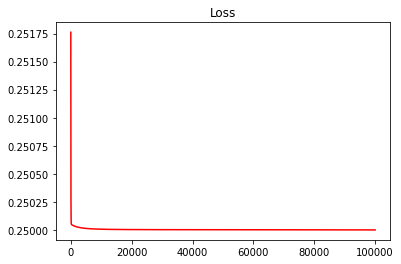

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[0.],
       [1.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.y)

0.2499986368812178